# NOAA NESDIS AOD 
NOAA NESDIS has an operational data product for the aerosol optical depth from the VIIRS satellite.  There are two products, the viirs edr and viirs eps available from ftp://ftp.star.nesdis.noaa.gov/pub/smcd/.  

## VIIRS EDR
The VIIRS EDR data is an aerosol optical depth product available at 0.1 and 0.25 degree resolution.  This VIIRS EDR product also does not include the Blue Sky algorithm to retrieve over bright surfaces such as the Sahara.  Lets open the data on a single day at first, in this case '2018-07-05'.  

In [1]:
from monet.sat import nesdis_edr_viirs
edr = nesdis_edr_viirs.open_dataset('2018-07-05')
print(edr)

<xarray.DataArray 'VIIRS EDR AOD' (time: 1, y: 1800, x: 3600)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2018-07-05
  * y          (y) int64 0 1 2 3 4 5 6 7 ... 1793 1794 1795 1796 1797 1798 1799
  * x          (x) int64 0 1 2 3 4 5 6 7 ... 3593 3594 3595 3596 3597 3598 3599
    latitude   (y, x) float64 -89.88 -89.88 -89.88 -89.88 ... 89.88 89.88 89.88
    longitude  (y, x) float64 -179.9 -179.8 -179.7 -179.6 ... 179.7 179.8 179.9
Attributes:
    units:      
    long_name:  Aerosol Optical Depth
    source:     ftp://ftp.star.nesdis.noaa.gov/pub/smcd/jhuang/npp.viirs.aero...


`edr` is now a `xarray.DataArray` for that day.  The `nesdis_edr_viirs` module downloads data to the current directory.  To download this into a different directory you can supply the `datapath=` keyword if needed. To quickly view this you can use the `monet` accessor.  

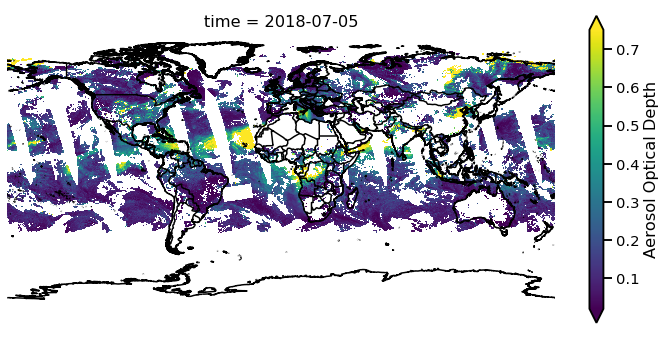

In [2]:
edr.monet.quick_map(robust=True)

The EDR data is available in two resolutions.  By default `monet` will download the 0.1 degree dataset.  If you would like the 0.25 degree dataset you can pass the kwarg `resolution='low'`.

In [3]:
edr = nesdis_edr_viirs.open_dataset('2018-07-05', resolution='low')
print(edr)

<xarray.DataArray 'VIIRS EDR AOD' (time: 1, y: 720, x: 1440)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2018-07-05
  * y          (y) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * x          (x) int64 0 1 2 3 4 5 6 7 ... 1433 1434 1435 1436 1437 1438 1439
    latitude   (y, x) float64 -89.88 -89.88 -89.88 -89.88 ... 89.88 89.88 89.88
    longitude  (y, x) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Attributes:
    units:      
    long_name:  Aerosol Optical Depth
    source:     ftp://ftp.star.nesdis.noaa.gov/pub/smcd/jhuang/npp.viirs.aero...


Notice that the dimensions changed from 1800x3600 to 720x1440.  

### Open Multiple Days
If you want to open multiple days in a sinlge call you could use the open_mfdataset.  Lets grab the first nine days of July 2018.  

In [4]:
import pandas as pd
dates = pd.date_range(start='2018-07-01',end='2018-07-09')
edr = nesdis_edr_viirs.open_mfdataset(dates)

In [5]:
print(edr)

<xarray.DataArray 'VIIRS EDR AOD' (time: 9, y: 1800, x: 3600)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * y          (y) int64 0 1 2 3 4 5 6 7 ... 1793 1794 1795 1796 1797 1798 1799
  * x          (x) int64 0 1 2 3 4 5 6 7 ... 3593 3594 3595 3596 3597 3598 3599
    latitude   (y, x) float64 -89.88 -89.88 -89.88 -89.88 ... 89.88 89.88 89.88
    longitude  (y, x) float64 -179.9

We can visualize these in a seaborn FacetGrid through xarray.  For more information on FacetGrid in `xarray` plotting please look here: http://xarray.pydata.org/en/stable/plotting.html#faceting

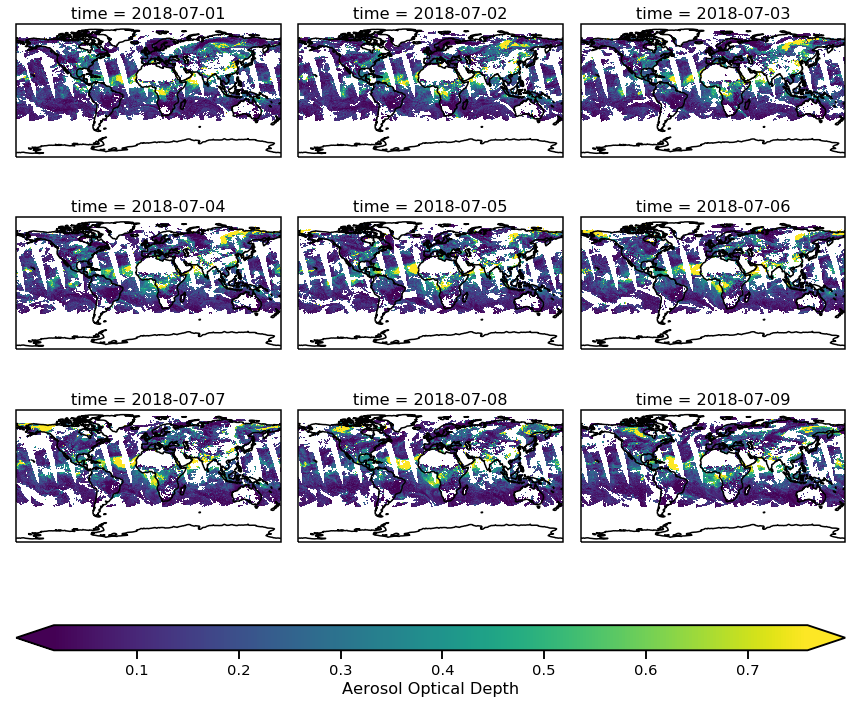

In [6]:
import cartopy.crs as ccrs # map projections and coastlines
cbar_kwargs=dict(orientation='horizontal',pad=0.1, aspect=30)
d = edr.plot.pcolormesh(x='longitude',y='latitude',col='time',col_wrap=3,
                        figsize=(12,12),robust=True,cbar_kwargs=cbar_kwargs,
                       subplot_kws={'projection':ccrs.PlateCarree()})
for ax in d.axes.flat:
    ax.coastlines()

## VIIRS EPS
The VIIRS EPS data includes the Blue Sky algorithm in the AOD calculation.  The same methods are available as with the `nesdis_edr_viirs` methods.

In [7]:
from monet.sat import nesdis_eps_viirs
eps = nesdis_eps_viirs.open_dataset('2018-07-05')
print(eps)

<xarray.DataArray 'VIIRS EPS AOT' (time: 1, y: 720, x: 1440)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
    latitude   (y, x) float64 89.88 89.88 89.88 89.88 ... -89.88 -89.88 -89.88
    longitude  (y, x) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 2018-07-05
Dimensions without coordinates: y, x
Attributes:
    units:      
    long_name:  Aerosol Optical Thickness
    source:     ftp://ftp.star.nesdis.noaa.gov/pub/smcd/VIIRS_Aerosol/npp.vii...


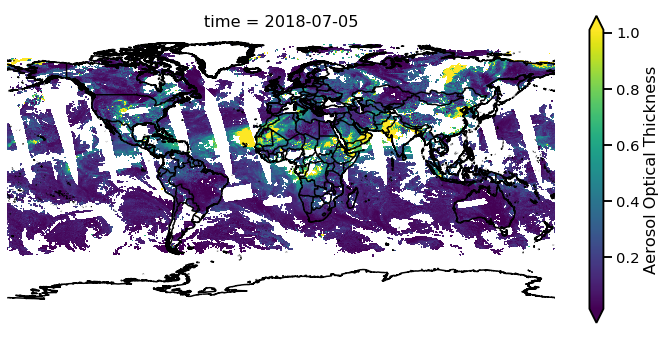

In [8]:
eps.monet.quick_map(robust=True)

Notice that there are AOD values over deserts such as the Sahara, Australia, northern China, Mongolia and the Middle East 